In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import ipywidgets as widgets

In [2]:
class TuringMachine:
    def __init__(self, tape_string):
        self.tape = {i: char for i, char in enumerate(tape_string)}
        self.head = 0
        self.state = 'q1'
        self.history = []
        self.rules = {
            ('q1', '1'): ('1', 'R', 'q1'),
            ('q1', '0'): ('1', 'R', 'q2'),
            ('q2', '1'): ('1', 'R', 'q2'),
            ('q2', '0'): ('0', 'L', 'q3'),
            ('q3', '1'): ('0', 'H', 'q3'),
            ('q3', '0'): ('0', 'H', 'q3')
        }

    def step(self):
        current_value = self.tape.get(self.head, '0')
        if (self.state, current_value) in self.rules:
            write, move, next_state = self.rules[(self.state, current_value)]
            self.tape[self.head] = write
            self.head += 1 if move == 'R' else -1
            self.state = next_state
            self.capture_state()
            if move == 'H':
                return False
            return True
        return False

    def run(self):
        self.capture_state()
        while self.step():
            pass

    def capture_state(self):
        min_index = min(self.tape.keys())
        max_index = max(self.tape.keys())
        tape_array = [self.tape.get(i, '0') for i in range(min_index, max_index + 1)]
        self.history.append((list(tape_array), self.head, self.state))

def update_plot(frame, tm, fig, ax1, ax2):
    tape_array, head, state = tm.history[frame]
    ax1.clear()
    ax2.clear()
    ax1.bar(range(len(tape_array)), [1]*len(tape_array), color='lightblue', edgecolor='black')
    ax1.set_ylim(0, 1.5)
    ax1.set_title(f'State: {state}, Head at: {head}')
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    for i, value in enumerate(tape_array):
        ax1.text(i, 0.5, value, ha='center', va='center', fontsize=12)
    ax1.plot([head], [1], 'ro')
    ax2.axis('off')
    table_data = [["State/Symbol", "0", "1"],
                  ["q1", "1 R q2", "1 R q1"],
                  ["q2", "0 L q3", "1 R q2"],
                  ["q3", "0 H q3", "0 H q3"]]
    table = ax2.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

def parse_input(input_str):
    try:
        a, b = map(int, input_str.split('+'))
        return '1' * a + '0' + '1' * b
    except:
        return None

def run_simulation(input_str):
    tape_string = parse_input(input_str)
    if tape_string:
        tm = TuringMachine(tape_string)
        tm.run()
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        ani = FuncAnimation(fig, update_plot, frames=len(tm.history), fargs=(tm, fig, ax1, ax2), repeat=False, interval=1500)
        display(HTML(ani.to_jshtml()))
    else:
        print("Invalid input. Please enter in the form of 'X+Y' where X and Y are integers.")

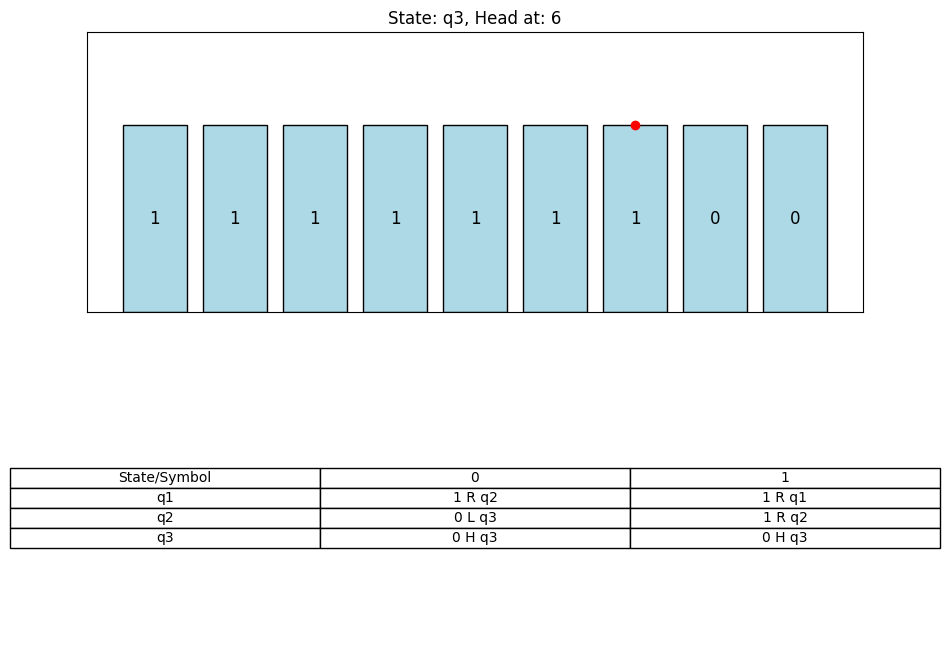

In [3]:
input_widget = widgets.Text(
    value='3+4',
    description='Input:',
    disabled=False
)

In [4]:
output_widget = widgets.Output()

In [5]:
def on_submit(change):
    output_widget.clear_output()
    with output_widget:
        run_simulation(input_widget.value)

In [6]:
input_widget.on_submit(on_submit)

C:\Users\15170\AppData\Local\Temp\ipykernel_18128\717977284.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  input_widget.on_submit(on_submit)


In [7]:
display(input_widget, output_widget)

Text(value='3+4', description='Input:')

Output()